# Empirical evaluation of the impact of k-means initialization
Evaluation the ability of k-means initializations strategies to make the algorithm convergence robust, as measured by the relative standard deviation of the inertia of the clustering
评估k-means 初始化策略使算法收敛稳健的能力，通过聚类惯性的相对标准偏差来衡量
* Following the first plot shows the best inertia reached for each combination of the model(KMeans or MiniBatch KMeans), and the init method for increasing values of the n_init parameter that controls the number of initializations
* The second plot demonstrates one single run of MiniBatchKMeans estimator using a"init-random" and n_init =1. This run leads to a bad convergence(local optimum), with estimated centers stuck between ground truth clusters.
*  The dataset used for evaluation is a 2D grid of isotropic Gaussian clusters widely spaced. 用于估计的数据集是一个有广泛间隔的各向同性高斯聚类的二维网格

In [1]:
# Authors: The scikit-learn developers
# Writer: wang
# SPDX-License-Identifier: BSD-3-Clause

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.utils import check_random_state, shuffle

random_state = np.random.RandomState(0)

n_runs = 5

n_init_range = np.array([1,5,10,15,20])

n_samples_per_center = 100
grid_size = 4
scale = 0.3
n_clusters = grid_size**2


def make_data(random_state, n_samples_per_center, grid_size, scale):
    random_state = check_random_state(random_state)
    centers = np.array([[i, j] for i in range(grid_size) for j in range(grid_size)])
    n_clusters_true, n_features = centers.shape

    noise = random_state.normal(
        scale=scale, size=(n_samples_per_center, centers.shape[1])
    )

    X = np.concatenate([c + noise for c in centers])
    y = np.concatenate([[i] * n_samples_per_center for i in range(n_clusters_true)])
    return shuffle(X, y, random_state=random_state)


Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


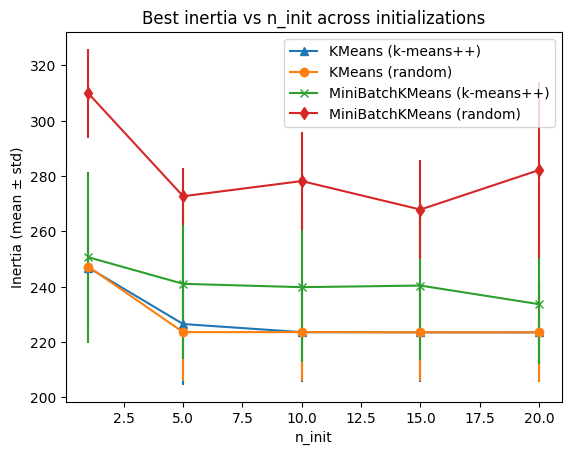

In [12]:
plt.figure()
plots = []
legends = []

cases =[
    (KMeans, "k-means++", {}, "^-"),
    (KMeans, "random", {}, "o-"),
    (MiniBatchKMeans, "k-means++", {"max_no_improvement": 3}, "x-"),
    (MiniBatchKMeans, "random", {"max_no_improvement": 3, "batch_size": 500}, "d-"),
]

for factory, init, params, fmt in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for i, n_init in enumerate(n_init_range):
        for run_id in range(n_runs):
            X, y = make_data(run_id, n_samples_per_center, grid_size, scale)
            km = factory(
                n_clusters=n_clusters,
                init=init,
                random_state=run_id,
                n_init=n_init,
                **params
            ).fit(X)
            inertia[i, run_id] = km.inertia_

    p = plt.errorbar(
        n_init_range, inertia.mean(axis=1), inertia.std(axis=1), fmt=fmt
    )
    plots.append(p[0])
    legends.append("%s (%s)" % (factory.__name__, init))

plt.xlabel("n_init")
plt.ylabel("Inertia (mean ± std)")
plt.legend(plots, legends)
plt.title("Best inertia vs n_init across initializations")
plt.show()


<Figure size 640x480 with 0 Axes>

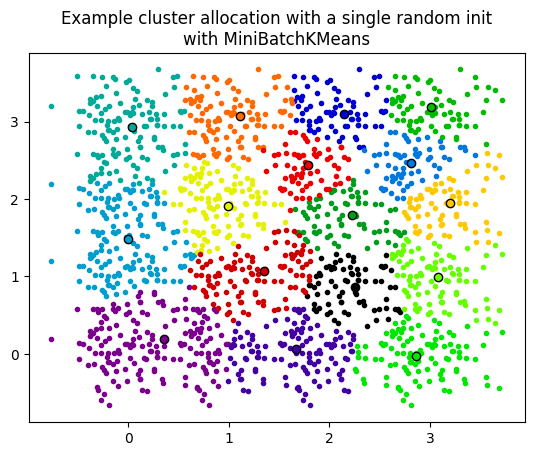

In [13]:
X, y = make_data(random_state, n_samples_per_center, grid_size, scale)
km = MiniBatchKMeans(
    n_clusters=n_clusters, init="random", n_init=1, random_state=random_state
).fit(X)

plt.figure()
plt.figure()
for k in range(n_clusters):
    my_members = km.labels_ == k
    color = cm.nipy_spectral(float(k) / n_clusters, 1)
    plt.plot(X[my_members, 0], X[my_members, 1], ".", c=color)
    cluster_center = km.cluster_centers_[k]
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=color,
        markeredgecolor="k",
        markersize=6,
    )
    plt.title(
        "Example cluster allocation with a single random init\nwith MiniBatchKMeans"
    )

plt.show()